Das Spiel Starcraft 2 (Komplexität 6.5, Action 7) wurde klassifiziert als: Strategie


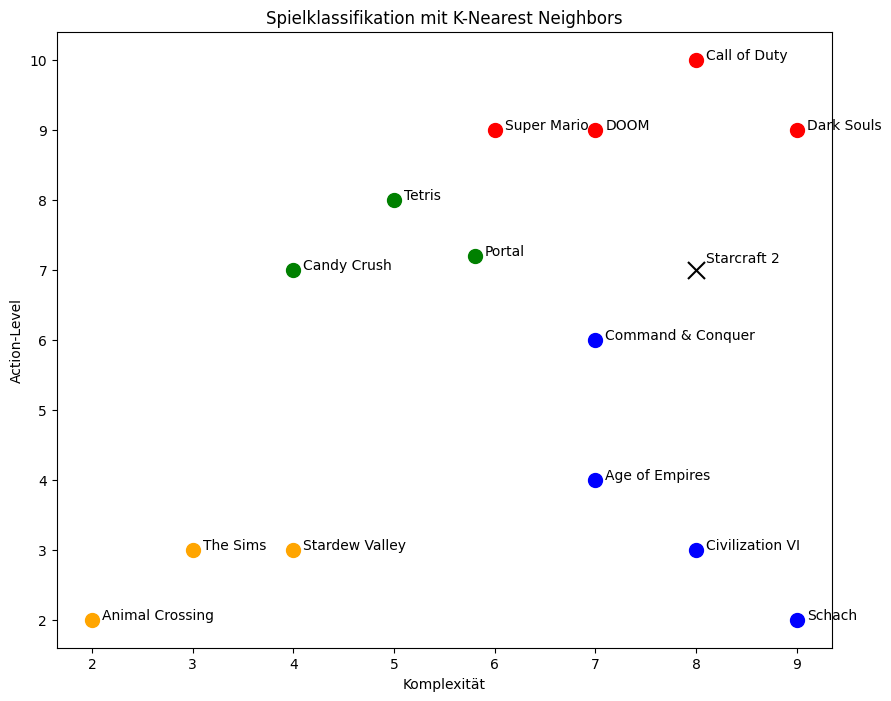

In [23]:
import math
import matplotlib.pyplot as plt
from collections import Counter

# Trainingsdaten mit mehreren Spielen je Kategorie
game_data = {
    "Schach": (9, 2), "Civilization VI": (8, 3), "Age of Empires": (7, 4), "Command & Conquer": (7, 6),  # Strategie
    "Tetris": (5, 8), "Candy Crush": (4, 7), "Portal": (5.8, 7.2),  # Puzzle
    "Dark Souls": (9, 9), "Call of Duty": (8, 10), "DOOM": (7, 9), "Super Mario": (6, 9),  # Action
    "Animal Crossing": (2, 2), "The Sims": (3, 3), "Stardew Valley": (4, 3)  # Simulation
}

# Labels für Kategorien
labels = {
    "Schach": "Strategie", "Civilization VI": "Strategie", "Age of Empires": "Strategie", "Command & Conquer": "Strategie",
    "Tetris": "Puzzle", "Candy Crush": "Puzzle", "Portal": "Puzzle",
    "Dark Souls": "Action", "Call of Duty": "Action", "DOOM": "Action", "Super Mario": "Action",
    "Animal Crossing": "Simulation", "The Sims": "Simulation", "Stardew Valley": "Simulation"
}

# Neues Spiel zum Klassifizieren
new_game = (8, 7)  # Starcraft 2

def euclidean_distance(p1, p2):
    """Berechnet die euklidische Distanz zwischen zwei Punkten."""
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def knn_manual(train_data, train_labels, new_point, k=3):
    """Manuelle Implementierung von K-Nearest Neighbors."""
    distances = []

    # Berechne die Distanz zu jedem bekannten Spiel
    for game, coords in train_data.items():
        distance = euclidean_distance(coords, new_point)
        distances.append((distance, train_labels[game]))

    # Sortiere nach Distanz und wähle die k nächsten Nachbarn
    distances.sort()
    k_nearest = distances[:k]

    # Stimmen auszählen
    category_count = Counter(label for _, label in k_nearest)

    # Meistvertretene Kategorie zurückgeben
    return category_count.most_common(1)[0][0]

# KNN-Klassifikation durchführen
k = 3
predicted_category = knn_manual(game_data, labels, new_game, k=k)
print(f"Das Spiel Starcraft 2 (Komplexität 6.5, Action 7) wurde klassifiziert als: {predicted_category}")

# Daten plotten
plt.figure(figsize=(10, 8))  # Increased figure size for better spacing
colors = {"Strategie": "blue", "Puzzle": "green", "Action": "red", "Simulation": "orange"}

# Spiele einzeichnen mit angepassten Offsets
for (game, (x, y)), label in zip(game_data.items(), labels.values()):
    plt.scatter(x, y, color=colors[label], s=100, label=label)
    plt.text(x + 0.1, y, game, fontsize=10)

# Neues Spiel (Starcraft 2) einzeichnen, bevor es klassifiziert wurde
plt.scatter(new_game[0], new_game[1], color="black", marker='x', s=150, label="Neues Spiel (Starcraft 2)")
plt.text(new_game[0] + 0.1, new_game[1] + 0.1, "Starcraft 2", fontsize=10)

# Legende hinzufügen
plt.xlabel("Komplexität")
plt.ylabel("Action-Level")
plt.title("Spielklassifikation mit K-Nearest Neighbors")
#plt.legend() # Legende hinzufügen
plt.show()


Das Spiel Starcraft 2 (Komplexität 6.5, Action 7) wurde klassifiziert als: Action


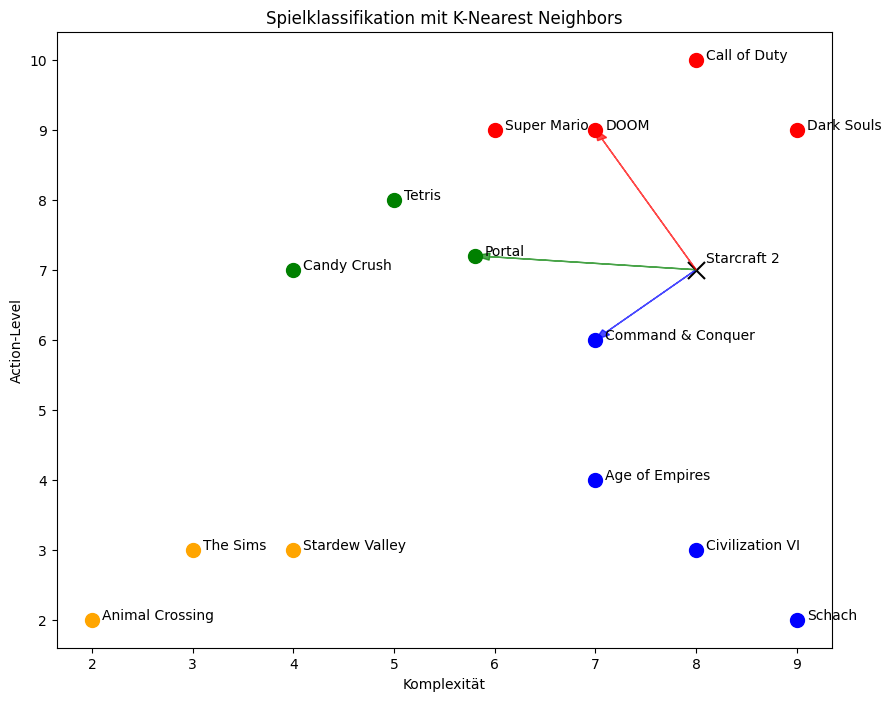

In [25]:

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Daten plotten
plt.figure(figsize=(10, 8))  # Increased figure size for better spacing
colors = {"Strategie": "blue", "Puzzle": "green", "Action": "red", "Simulation": "orange"}

# Spiele einzeichnen mit angepassten Offsets
for (game, (x, y)), label in zip(game_data.items(), labels.values()):
    plt.scatter(x, y, color=colors[label], s=100, label=label)
    plt.text(x + 0.1, y, game, fontsize=10)

# Neues Spiel (Starcraft 2) einzeichnen
plt.scatter(new_game[0], new_game[1], color="black", marker='x', s=150, label="Neues Spiel (Starcraft 2)")
plt.text(new_game[0] + 0.1, new_game[1] + 0.1, "Starcraft 2", fontsize=10)

# Berechne die Distanzen und finde die k nächsten Nachbarn
distances = []
for game, coords in game_data.items():
    distance = euclidean_distance(coords, new_game)
    distances.append((distance, game, labels[game]))  # Speichere auch den Spielnamen und das Label
distances.sort()
k_nearest = distances[:k]

# Zeichne die Pfeile zu den k nächsten Nachbarn
for distance, game, label in k_nearest:
    x_neighbor, y_neighbor = game_data[game]
    plt.arrow(new_game[0], new_game[1], x_neighbor - new_game[0], y_neighbor - new_game[1],
              color=colors[label], head_width=0.1, length_includes_head=True, alpha=0.7)


# Legende hinzufügen
plt.xlabel("Komplexität")
plt.ylabel("Action-Level")
plt.title("Spielklassifikation mit K-Nearest Neighbors")
#plt.legend() # Legende hinzufügen
plt.show()
